**Section 4 勾配降下法**

**Section 5 誤差逆伝播法**

In [ ]:
cd C:\Users\zawaz\Desktop\study_ai_ml_google\DNN_code_colab_lesson_1_2

In [2]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

In [158]:
def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

def init_network(firstNode=2,nodesNum=3,lastNode=2):
    print("##### ネットワークの初期化 #####")

    network = {}
#     network['W1'] = np.array([
#         [0.1, 0.3, 0.5],
#         [0.2, 0.4, 0.6]
#     ])

#     network['W2'] = np.array([
#         [0.1, 0.4],
#         [0.2, 0.5],
#         [0.3, 0.6]
#     ])

#     network['b1'] = np.array([0.1, 0.2, 0.3])
#     network['b2'] = np.array([0.1, 0.2])
    
    
    network['W1'] = np.random.randn(firstNode, nodesNum)
    network['W2'] = np.random.randn(nodesNum,lastNode)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn(lastNode)
        
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

def forward(network, x):
#     print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
#     y = functions.softmax(u2)
    y = u2
    
#     print_vec("総入力1", u1)
#     print_vec("中間層出力1", z1)
#     print_vec("総入力2", u2)
#     print_vec("出力1", y)
#     print("出力合計: " + str(np.sum(y)))

    return y, z1

In [159]:
def backward(x, d, z1, y):
#     print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
#     delta2 = functions.d_sigmoid_with_loss(d, y)
    delta2 = functions.d_mean_squared_error(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
#     print_vec("偏微分_dE/du2", delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
#     print_vec("偏微分_dE/du2", delta1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

#     print_vec("偏微分_重み1", grad["W1"])
#     print_vec("偏微分_重み2", grad["W2"])
#     print_vec("偏微分_バイアス1", grad["b1"])
#     print_vec("偏微分_バイアス2", grad["b2"])

    return grad

In [156]:
# 訓練データ
x = np.array([[1.0, 5.0]])
# 目標出力
d = np.array([[0, 1]])
#  学習率
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

# 誤差
loss1 = functions.cross_entropy_error(d, y)
print_vec("loss1",loss1)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

print("##### 結果表示 #####")  

y2, z12 = forward(network, x)
loss2 = functions.cross_entropy_error(d, y2)
print_vec("loss2",loss2)

print("##### 更新後パラメータ #####") 
print_vec("重み1", network['W1'])
print_vec("重み2", network['W2'])
print_vec("バイアス1", network['b1'])
print_vec("バイアス2", network['b2'])

##### ネットワークの初期化 #####
*** 重み1 ***
[[ 0.19187865  0.77879186  0.26868155]
 [ 0.03103215 -0.91146877  0.94964822]]

*** 重み2 ***
[[-0.35626312  1.31509972]
 [ 0.50553098  0.66737735]
 [-0.80296317  1.47771501]]

*** バイアス1 ***
[-0.1007849  -0.34950915  1.47603096]

*** バイアス2 ***
[ 0.58582217 -1.12216349]

##### 順伝播開始 #####
*** loss1 ***
-2.1743449096365244


##### 誤差逆伝播開始 #####
*** 偏微分_dE/du2 ***
[[-4.71551183  7.79642068]]

*** 偏微分_dE/du2 ***
[[11.93303361  0.         15.30727018]]

##### 結果表示 #####
##### 順伝播開始 #####
*** loss2 ***
-0.08855679170247827

##### 更新後パラメータ #####
*** 重み1 ***
[[ 0.07254832  0.77879186  0.11560885]
 [-0.56561953 -0.91146877  0.18428471]]

*** 重み2 ***
[[-0.34465096  1.29590068]
 [ 0.50553098  0.66737735]
 [-0.49678718  0.97149703]]

*** バイアス1 ***
[-0.22011524 -0.34950915  1.32295826]

*** バイアス2 ***
[ 0.63297728 -1.20012769]



In [166]:
# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

def f(x):
    y = 3 * x[0]**2 + 2 * x[1]
    return y

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.06

# 抽出数
epoch = 2000

# パラメータの初期化
network = init_network(2,30,1)
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x_, d = dataset['x'], dataset['d']
    x = x_[np.newaxis,:]
    y, z1 = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


##### ネットワークの初期化 #####
*** 重み1 ***
[[-0.29225796  0.98508164 -0.66924177  0.0797783  -0.29798726  0.41714759
   0.37856158 -0.68891242 -1.21566482 -0.06857517 -1.7039425  -0.84314487
   0.31922425 -0.27871193  1.33532816  0.46667898  1.00766694 -1.44217745
  -0.42818187  2.0148607   1.77243793  0.10978657  0.22997063  0.75892031
  -1.57062634 -0.34456892 -1.21070746 -1.35272473 -1.87981953 -0.3581625 ]
 [-0.54937048  1.8824244  -0.7609003  -0.24438728 -0.42452626 -0.07177102
   0.52240615 -0.77084818  1.99244244  1.19102427  0.03536658  1.58262634
  -0.86703823 -0.67720919 -1.00270158 -0.08858491 -1.04532776 -0.54855378
  -0.97735225 -0.75634613  0.74379505  0.26416403  0.9289189  -0.55394556
   1.70708708 -3.35481451 -0.24121956  1.30286261  0.27380861 -0.83096446]]

*** 重み2 ***
[[ 1.75963189]
 [-0.4405648 ]
 [-0.30688098]
 [-0.80620621]
 [-0.21492496]
 [ 0.68255321]
 [ 0.58052748]
 [-0.55477861]
 [ 0.47929342]
 [ 0.32963686]
 [ 1.14140947]
 [-0.10420234]
 [-0.77242259]
 [ 0.99804377]

(0, 1)

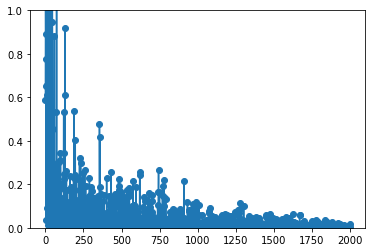

In [167]:
plt.plot(lists, losses, 'o-')
plt.ylim([0,1])

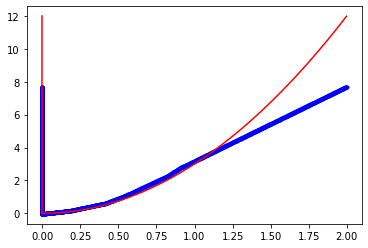

In [168]:
test = [[i/500,0] for i in range(1000)]
test_y = [3*(i/500)**2  for i in range(1000)]
y = np.zeros(1000)
z1 = np.zeros(1000)
for j in range(1000):
    y_,z1_ = forward(network,test[j])
    y[j] = y_
plt.plot(test,y,'b.')
plt.plot(test,test_y,'r-')    

勾配降下法を用いて、誤差を逆伝播させる学習を行った。また、NNのパラメーターを変えながらの考察も行った。  
最後に行ったのは、関数が二次の形でも推測できるかどうか検証した。結果的にわかったのは、中間層を増やすと、二次特融の曲線の形も徐々に表現できるようになるということと、学習のデータ範囲に依存するということだ。  
あらかじめ関数の次数がわかっているなどの知見がある場合は、わざわざNNを使う必要はない一方、かなりいろいろなデータに追従することがわかった。